In [16]:
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")
import numpy as np
mnist=fetch_openml("mnist_784",version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X,y= mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [18]:
y.shape

(70000,)

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

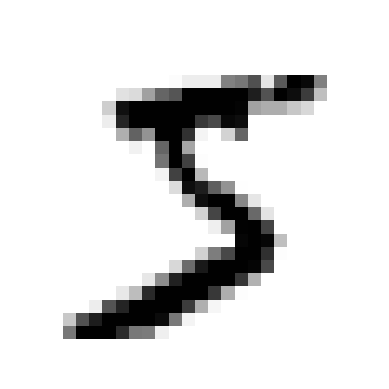

In [20]:
plt.imshow(some_digit_image,cmap=mpl.cm.binary)#,interploation="nearest")
plt.axis("off")
plt.show()

In [21]:
y[0]

'5'

In [23]:
y=y.astype(np.uint8)

In [24]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [25]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [27]:
from sklearn.linear_model import SGDClassifier

In [30]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [31]:
sgd_clf.predict([some_digit])


array([ True])

In [41]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone
# skfolds = StratifiedKFold(n_splits=3, random_state=42)
# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

## Measuring Accuracy Using Cross-Validation 

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [34]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [35]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [37]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [39]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [40]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [42]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [43]:
(0.8370879772350012+0.6511713705958311)/2

0.7441296739154162

In [44]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [46]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [47]:
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

By raising the threshold the recal reduces

In [48]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [50]:
from sklearn.metrics import precision_recall_curve 
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

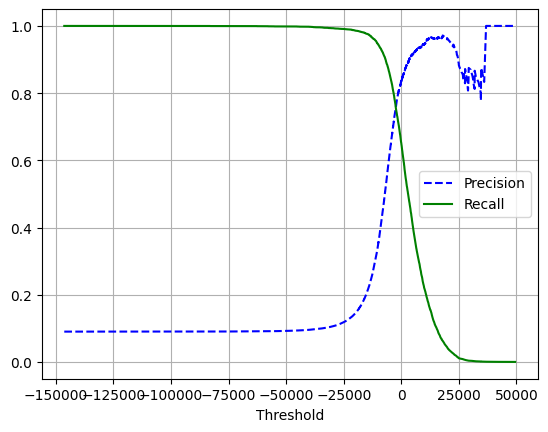

In [62]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.legend()
    plt.grid()
    plt.xlabel("Threshold")

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [63]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [64]:
y_train_pred_90=(y_scores >= threshold_90_precision)

In [66]:
precision_score(y_train_5,y_train_pred_90)


0.9000345901072293

In [67]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [68]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

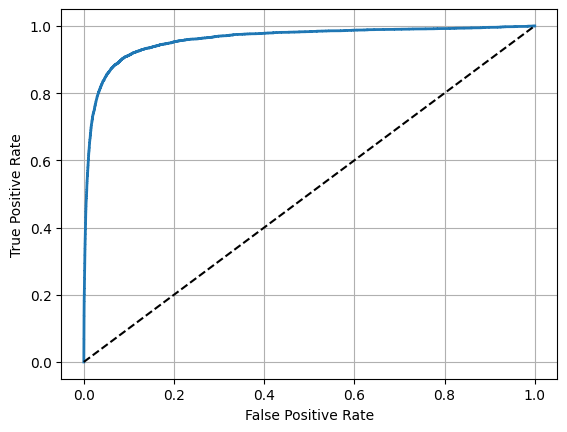

In [70]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--',)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
plot_roc_curve(fpr,tpr)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [73]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [74]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

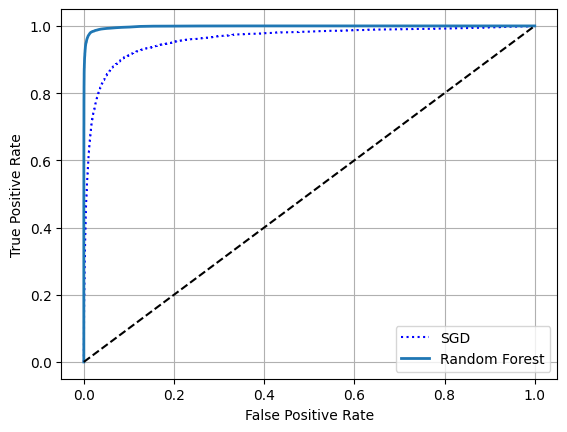

In [76]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [77]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

## Multiclass Classification

In [78]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [79]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [81]:
np.argmax(some_digit_scores)

3

In [82]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [83]:
sgd_clf.classes_[5]

5

In [85]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [87]:
len(ovo_clf.estimators_)


45

In [90]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])


array([5], dtype=uint8)

In [91]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [92]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [94]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

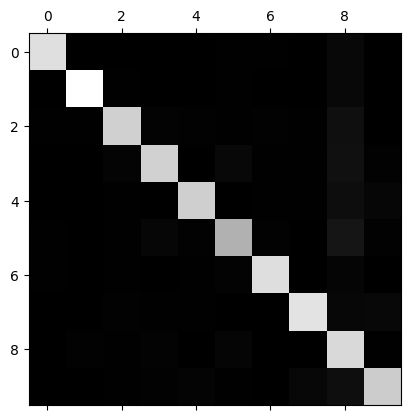

In [95]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [96]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

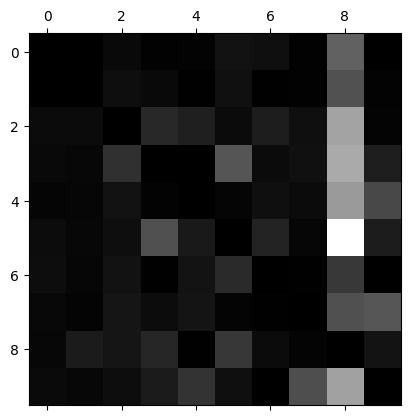

In [97]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [122]:
def plot_digit(data):
    image = data.values.reshape(28, 28)  # Convert to NumPy array and reshape
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

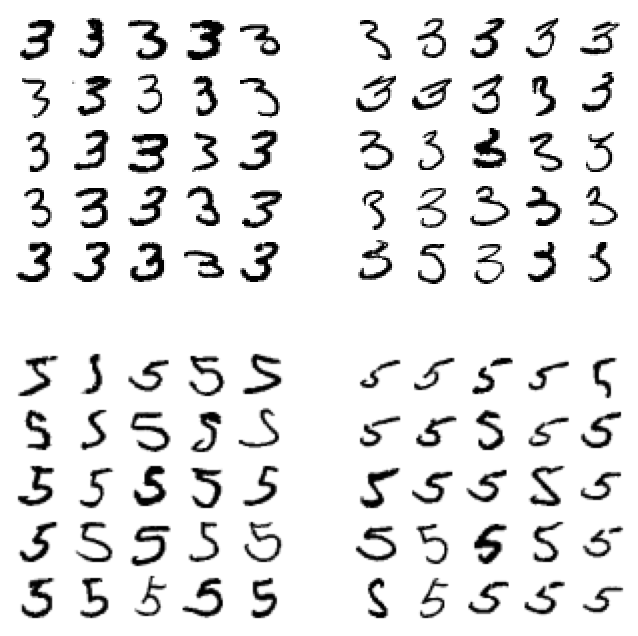

In [114]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a)& (y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)& (y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)& (y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)& (y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [115]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train >=7)
y_train_odd=(y_train % 2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [116]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [117]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.976410265560605

In [120]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = y_train
y_test_mod = y_test

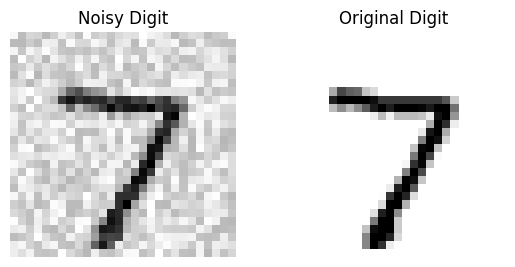

In [123]:
some_index = 0

# Plot the noisy digit from X_test_mod and the original digit from X_test
plt.subplot(121)
plot_digit(X_test_mod.iloc[some_index])  # Use iloc for indexing
plt.title("Noisy Digit")

plt.subplot(122)
plot_digit(X_test.iloc[some_index])  # Plot original image
plt.title("Original Digit")

# Show the plots
plt.show()